In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df= pd.read_csv('./PTCK.csv')
df2=pd.read_csv('./PTCK1.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# các tập đoàn khai thác dữ liệu

In [3]:
k=df.company_name.value_counts()
a=k.index
k=df2.company_name.value_counts()
b=k.index
print(a,'\n',b)

Index(['ACB', 'BCM', 'BID', 'CTG', 'BVH', 'FPT', 'GAS', 'GVR', 'MBB', 'VCB'], dtype='object') 
 Index(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TSLA'], dtype='object')


# Tiền xử lí dữ liệu

#### kiểm tra các dữ liệu lỗi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2650 non-null   object 
 1   Close         2650 non-null   float64
 2   High          2650 non-null   float64
 3   Low           2650 non-null   float64
 4   Open          2650 non-null   float64
 5   company_name  2650 non-null   object 
 6   Volume        2650 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 145.0+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1345 non-null   object 
 1   Open          1345 non-null   float64
 2   High          1345 non-null   float64
 3   Low           1345 non-null   float64
 4   Close         1345 non-null   float64
 5   Volume        1345 non-null   int64  
 6   company_name  1345 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df2['Date'] = pd.to_datetime(df2['Date'])

### nhật xét
- đổi kiểu dữ liệu của cột t thành datetime
- đổi kiểu dữ liệu của cột date thành datetime

In [8]:
df.isnull().sum()

Date            0
Close           0
High            0
Low             0
Open            0
company_name    0
Volume          0
dtype: int64

In [9]:
df2.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
company_name    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df2.duplicated().sum()

0

#### kiểm tra giá trị ngoại lai

In [12]:
for i in b:
    delta=df2[df2['company_name']==i]
    delta=delta[['Close','High','Low','Open','Volume']]
    # Tính IQR cho từng cột
    Q1 = delta.quantile(0.25)
    Q3 = delta.quantile(0.75)
    IQR = Q3 - Q1
    
#    print(i,"\n",Q1,"\n",Q3,"\n",IQR,"\n -------------------")
    
    # Tìm các giá trị ngoại lai
    outliers = delta[(delta < (Q1 - 1.5 * IQR)) | (delta > (Q3 + 1.5 * IQR))].dropna(how='all')

    
    # In các giá trị ngoại lai
    print(i,'\n',outliers.isnull().sum())

APPLE 
 Close     14
High      14
Low       14
Open      14
Volume     0
dtype: int64
GOOGLE 
 Close     13
High      13
Low       13
Open      13
Volume     0
dtype: int64
MICROSOFT 
 Close     11
High      11
Low       11
Open      11
Volume     0
dtype: int64
AMAZON 
 Close     22
High      22
Low       22
Open      22
Volume     0
dtype: int64
TSLA 
 Close     31
High      31
Low       31
Open      31
Volume     0
dtype: int64


In [13]:


for i in a:
    delta=df[df['company_name']==i]
    delta=delta[['Close','High','Low','Open','Volume']]
    # Tính IQR cho từng cột
    Q1 = delta.quantile(0.25)
    Q3 = delta.quantile(0.75)
    IQR = Q3 - Q1
    
    #print(i,"\n",Q1,"\n",Q3,"\n",IQR,"\n -------------------")
    
    # Tìm các giá trị ngoại lai
    outliers = delta[(delta < (Q1 - 1.5 * IQR)) | (delta > (Q3 + 1.5 * IQR))].dropna(how='all')

    
    # In các giá trị ngoại lai
    print(i,'\n',outliers.isnull().sum())

ACB 
 Close     16
High      17
Low       14
Open      16
Volume     3
dtype: int64
BCM 
 Close     19
High      15
Low       18
Open      16
Volume     5
dtype: int64
BID 
 Close     13
High      13
Low       13
Open      13
Volume     0
dtype: int64
CTG 
 Close     16
High      12
Low       15
Open      16
Volume     5
dtype: int64
BVH 
 Close     11
High      10
Low       11
Open      10
Volume     2
dtype: int64
FPT 
 Close     17
High      17
Low       17
Open      16
Volume     1
dtype: int64
GAS 
 Close     18
High      18
Low       19
Open      20
Volume     5
dtype: int64
GVR 
 Close     10
High      10
Low       10
Open      10
Volume     0
dtype: int64
MBB 
 Close     15
High      15
Low       15
Open      15
Volume     0
dtype: int64
VCB 
 Close     15
High      14
Low       16
Open      13
Volume     5
dtype: int64


### nhật xét
- nhận thấy có nhiều giá trị ngoại lai nhưng khi kiểm tra lại tại sàn thì chúng hoàn toàn đúng

- do lấy thời gian hơn 1 năm thị trường chứng khoán đã có rất nhiều tăng trưởng nên giá trị ngoại lai này không có gì là điều lạ


# EDA

### describe

In [14]:
for i in a:
    print( i,df[df['company_name']==i].describe(),'\n')

ACB             Close        High         Low        Open        Volume
count  265.000000  265.000000  265.000000  265.000000  2.650000e+02
mean    24.161623   24.502792   23.855623   24.185283  3.925639e+06
std      2.154115    2.085025    2.216816    2.144816  2.811897e+06
min     17.500000   18.700000   17.450000   17.900000  7.281000e+05
25%     22.760000   23.000000   22.450000   22.750000  2.239300e+06
50%     24.300000   24.700000   24.000000   24.400000  3.338200e+06
75%     25.700000   26.050000   25.320000   25.800000  4.715700e+06
max     28.600000   29.080000   28.400000   28.720000  3.246120e+07 

BCM             Close        High         Low        Open        Volume
count  265.000000  265.000000  265.000000  265.000000  2.650000e+02
mean    77.679283   78.878604   75.722415   77.317660  2.447709e+05
std      7.993101    7.886048    7.743994    7.906188  2.034587e+05
min     58.440000   59.430000   57.740000   57.740000  2.410000e+04
25%     72.920000   74.410000   71.030

In [15]:
for i in b:
    print( i,df2[df2['company_name']==i].describe(),'\n')

APPLE              Open        High         Low       Close        Volume
count  269.000000  269.000000  269.000000  269.000000  2.690000e+02
mean   152.449554  154.581227  150.405130  152.569702  8.656383e+07
std     13.042074   12.930713   13.024499   13.009622  2.403650e+07
min    126.010002  127.769997  124.169998  125.019997  3.519590e+07
25%    142.539993  144.500000  140.550003  142.649994  7.020790e+07
50%    150.899994  153.100006  149.130005  151.009995  8.147420e+07
75%    163.509995  165.850006  160.889999  163.619995  9.562320e+07
max    178.550003  179.610001  176.699997  178.960007  1.826020e+08 

GOOGLE              Open        High         Low       Close        Volume
count  269.000000  269.000000  269.000000  269.000000  2.690000e+02
mean   112.346275  113.965466  110.760401  112.306195  2.908013e+07
std     15.925171   15.956540   15.625861   15.762325  1.158523e+07
min     85.510002   86.550003   83.449997   83.489998  8.567800e+06
25%     99.010002  100.440002   9

## trực quan hóa

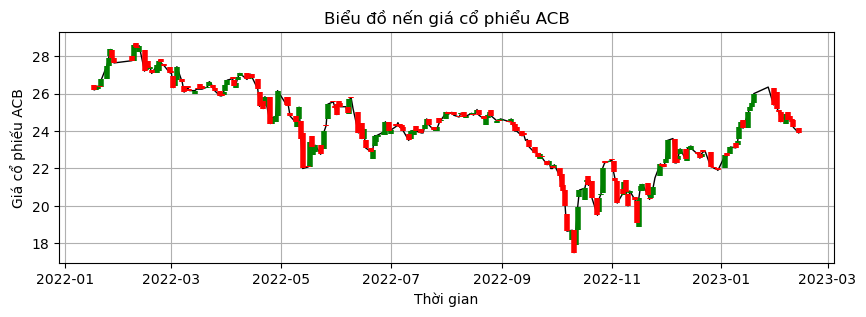

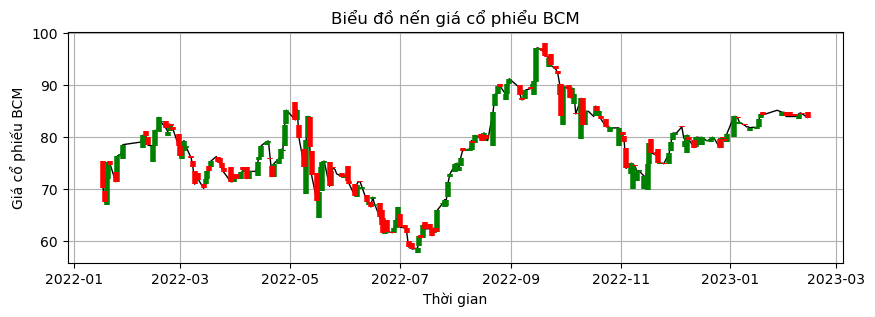

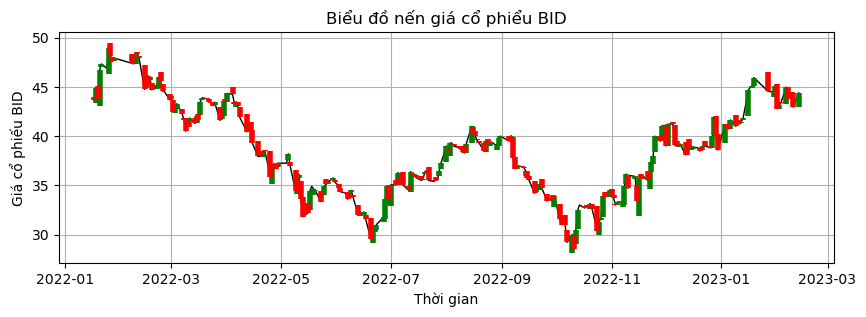

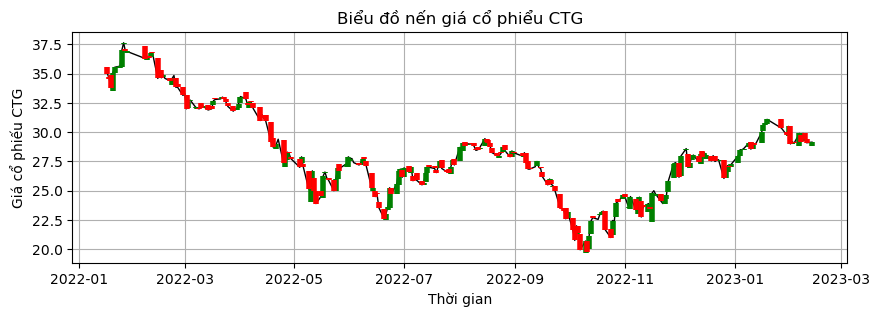

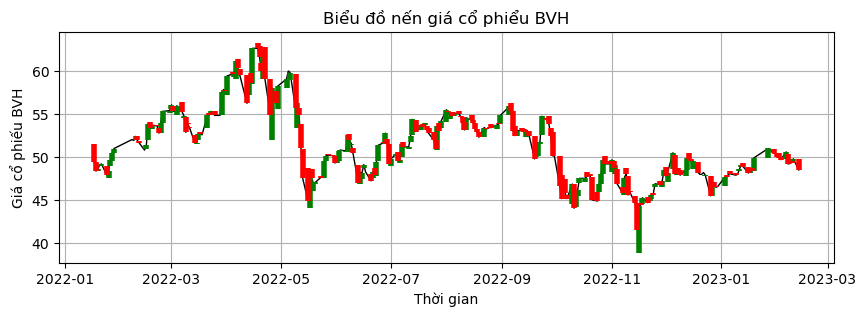

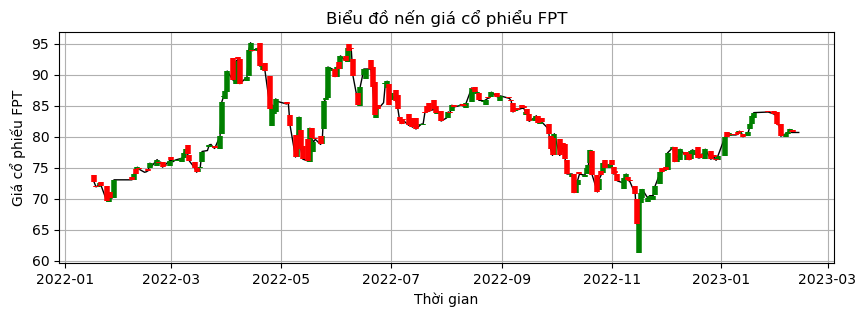

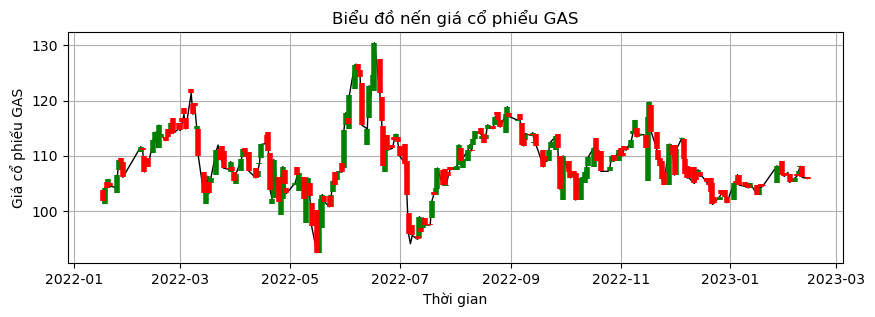

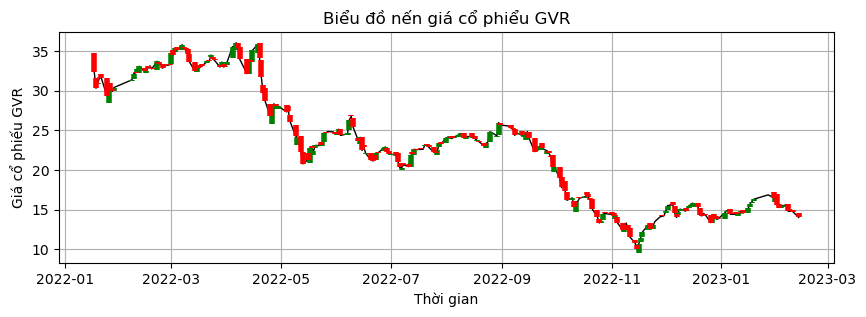

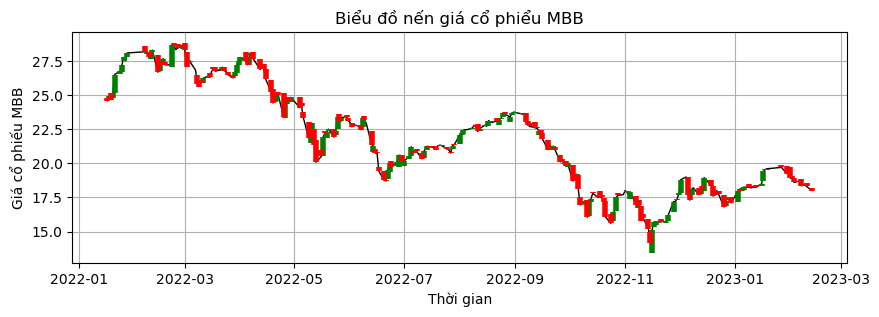

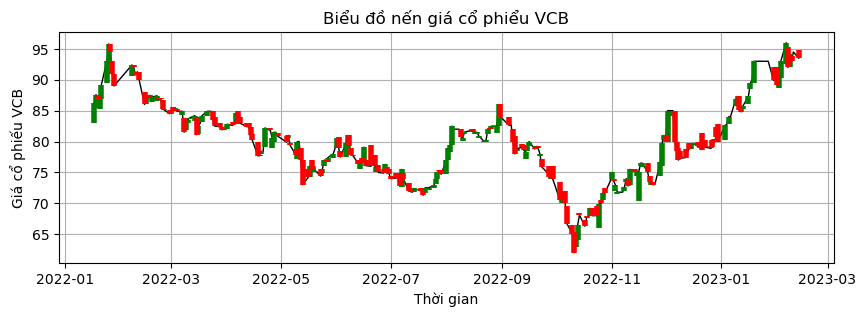

In [16]:

# Tạo biểu đồ nến
for i in a:
    k=0
    delta=df[df['company_name']==i]
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_title('Biểu đồ nến giá cổ phiểu '+i)
    ax.set_xlabel('Thời gian')
    ax.set_ylabel('Giá cổ phiếu '+i)
    ax.grid(True)

    candlestick = ax.plot(delta.Date, delta['Close'], color='black', linewidth=1)
    
    #print(delta)
    # Thiết lập màu cho các nến tăng và giảm
    
#     delta['Close'] = pd.to_numeric(delta['Close'], errors='coerce')
#     delta['Open'] = pd.to_numeric(delta['Open'], errors='coerce')
    
    up_candle = delta['Close'] > delta['Open']
    ax.vlines(delta[up_candle].Date, delta[up_candle]['Open'], delta[up_candle]['Close'], color='Green', linewidth=4)

    down_candle = delta['Open'] > delta['Close']
    ax.vlines(delta[down_candle].Date, delta[down_candle]['Open'], delta[down_candle]['Close'], color='red', linewidth=4)


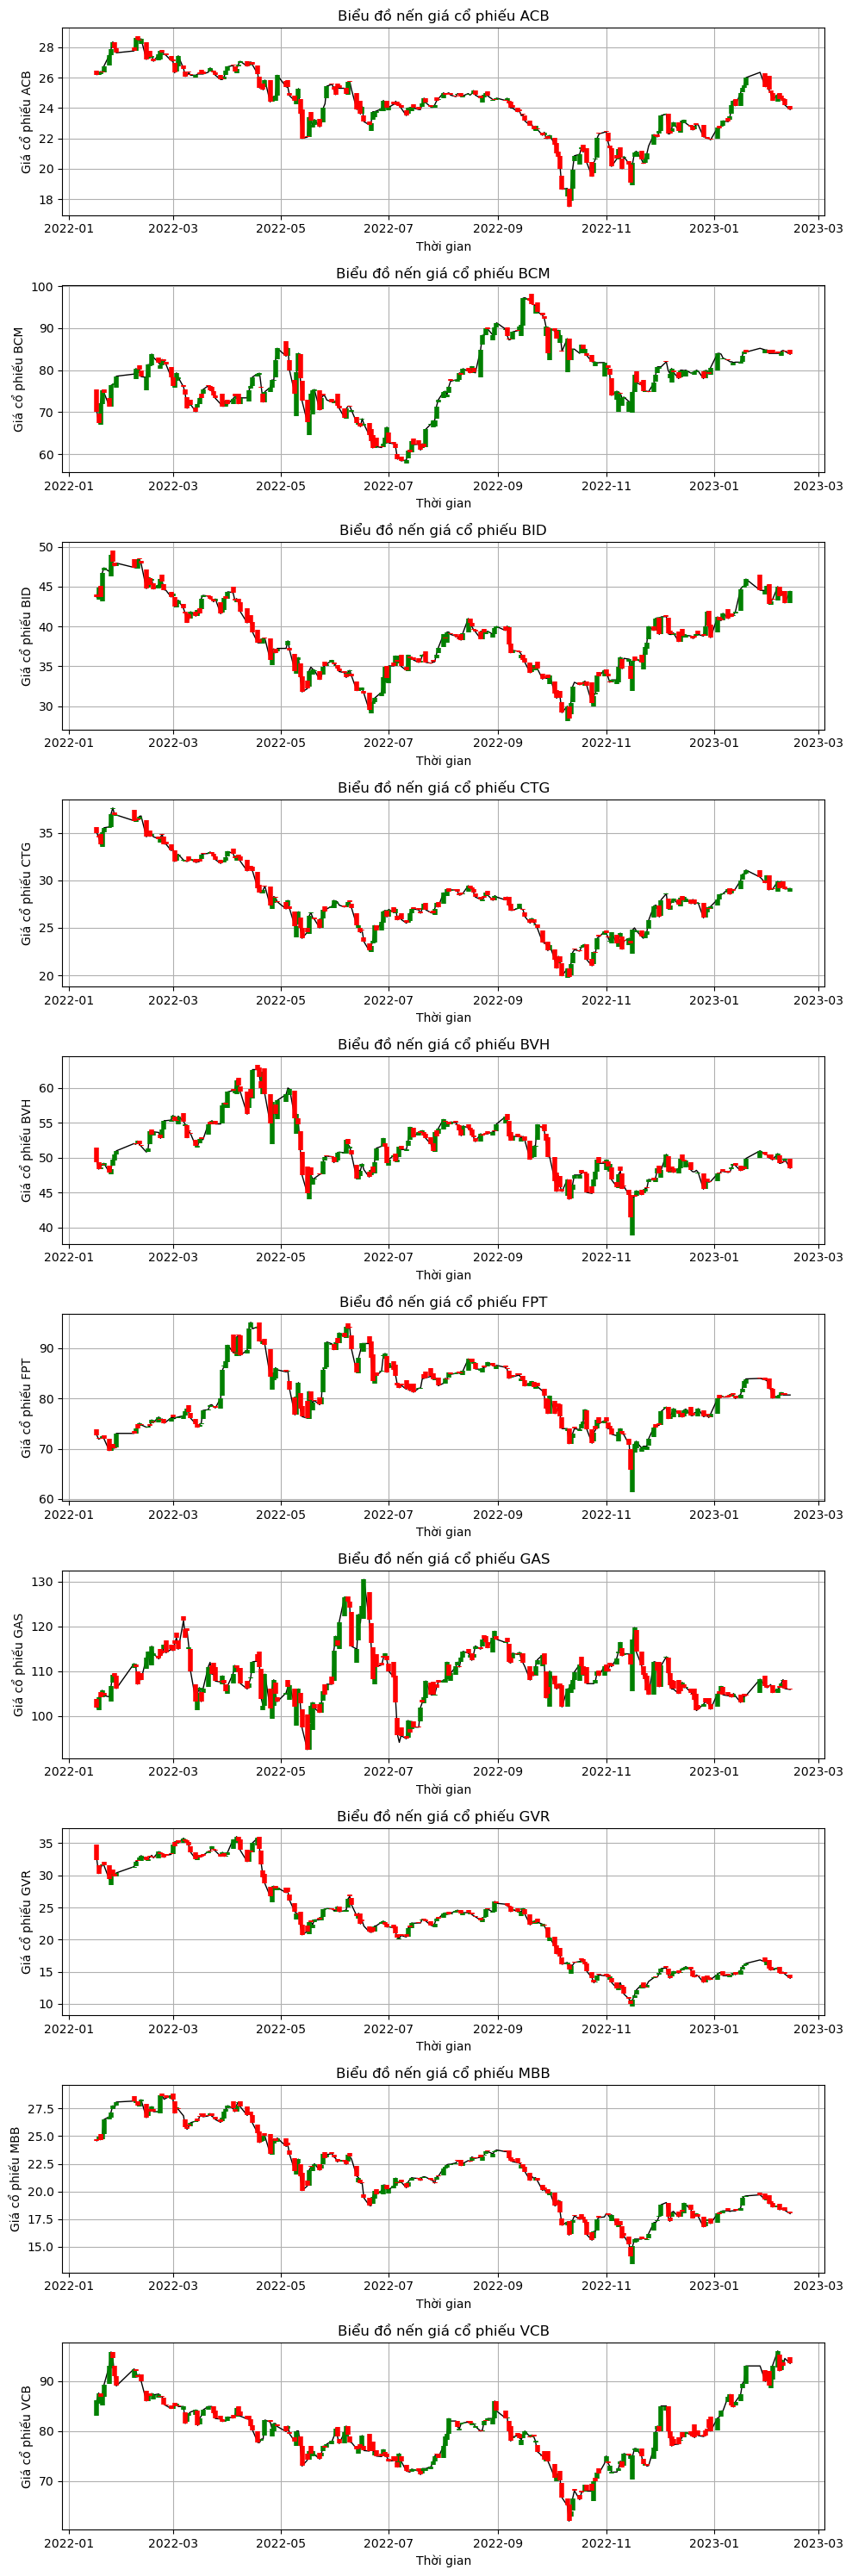

In [17]:
fig, axs = plt.subplots(nrows=len(a), figsize=(10,3*len(a)))

for i, ax in enumerate(axs):
    delta = df[df['company_name'] == a[i]]
    ax.set_title('Biểu đồ nến giá cổ phiếu '+a[i])
    ax.set_xlabel('Thời gian')
    ax.set_ylabel('Giá cổ phiếu '+a[i])
    ax.grid(True)

    candlestick = ax.plot(delta.Date, delta['Close'], color='black', linewidth=1)
    
    up_candle = delta['Close'] > delta['Open']
    ax.vlines(delta[up_candle].Date, delta[up_candle]['Open'], delta[up_candle]['Close'], color='Green', linewidth=4)

    down_candle = delta['Open'] > delta['Close']
    ax.vlines(delta[down_candle].Date, delta[down_candle]['Open'], delta[down_candle]['Close'], color='red', linewidth=4)

plt.tight_layout()
plt.show()

<Figure size 1200x900 with 0 Axes>

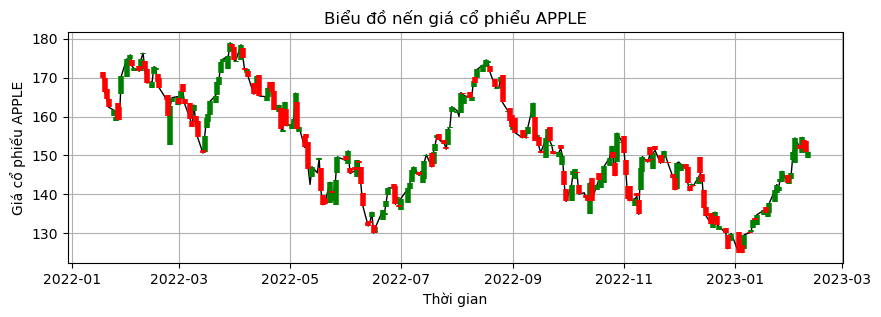

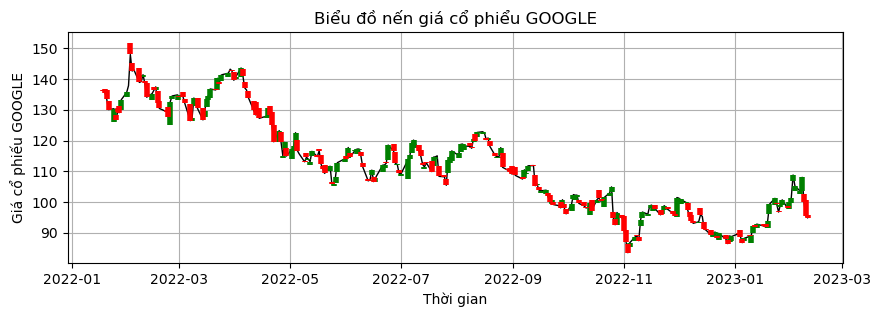

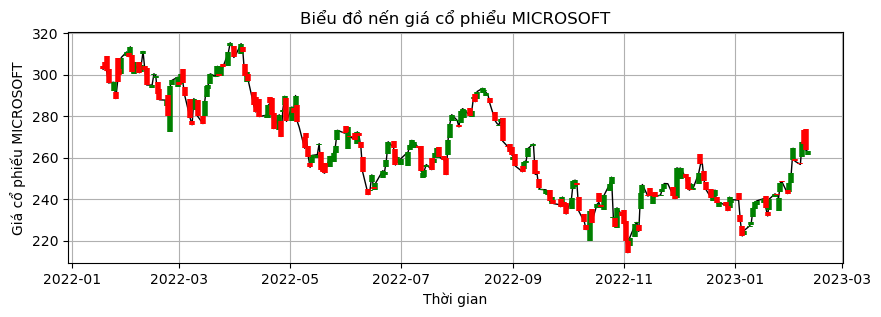

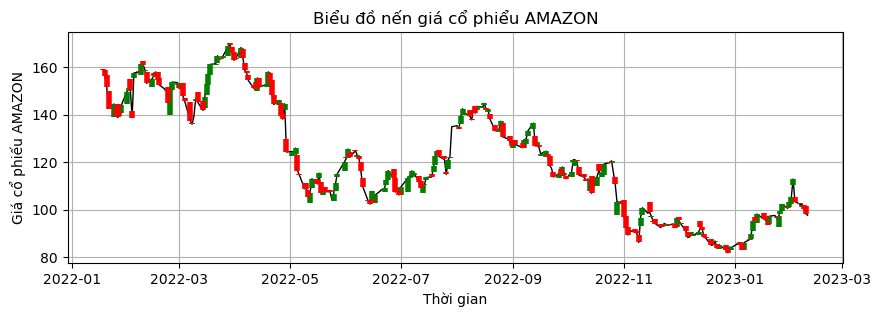

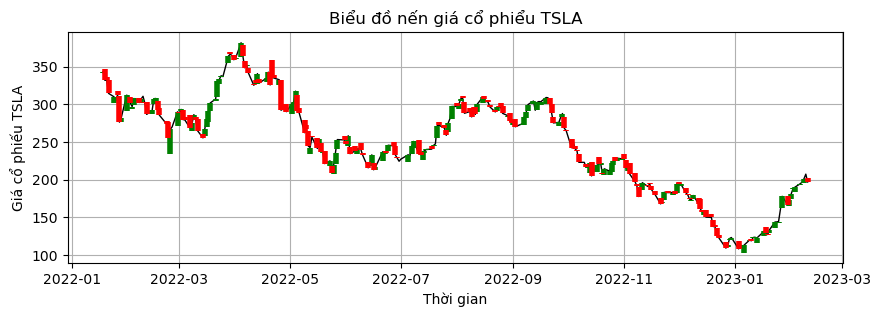

In [18]:
# Tạo biểu đồ nến
plt.figure(figsize=(12, 9))
for i in b:
    
    k=0
    delta=df2[df2['company_name']==i]
    fig, ax = plt.subplots(figsize=(10,3))
    ax.set_title('Biểu đồ nến giá cổ phiểu '+i)
    ax.set_xlabel('Thời gian')
    ax.set_ylabel('Giá cổ phiếu '+i)
    ax.grid(True)

    candlestick = ax.plot(delta.Date, delta['Close'], color='black', linewidth=1)

    # Thiết lập màu cho các nến tăng và giảm
    up_candle = delta['Close'] > delta['Open']
    ax.vlines(delta[up_candle].Date, delta[up_candle]['Open'], delta[up_candle]['Close'], color='Green', linewidth=4)

    down_candle = delta['Open'] > delta['Close']
    ax.vlines(delta[down_candle].Date, delta[down_candle]['Open'], delta[down_candle]['Close'], color='red', linewidth=4)

    plt.show()

## Phân Tích Kỹ thuật cơ bản bằng phương pháp Vẽ Đường TB của 10 ngày, 20 ngày, 50 ngày
- tính đường tb

In [19]:
dental={}
k=0
for i in a:
    dental[k]=df[df['company_name']==i]
    k+=1
    
betal ={}
h=0
for i in b:
    betal[h]=df2[df2['company_name']==i]
    h+=1
    
ngay_TB = [10, 20, 50]



# h=0
# for dt in dental:
#     print(dental[h])
#     h+=1
for TB in ngay_TB:
    for i in range(10):
        dt=dental[i]
        column_name = f"TB {TB} ngày"
        dt['Close'] = dt['Close'].astype(object)
        dt[column_name] = dt['Close'].rolling(window=TB).mean()
        dental[i]=dt
    for i in range(5):
        d=betal[i]
        column_name = f"TB {TB} ngày"
        d['Close'] = d['Close'].astype(object)
        d[column_name] = d['Close'].rolling(window=TB).mean()
        betal[i]=d


### Nhật xét 
- khi tính trung bình 10 20 50 ngày thì có những giá trị mà rolling không lấy đủ nó sẽ lun
### Phương Pháp Giải Quyết 
- gán nó bằng giá trị gần nó nhất trong cột

In [20]:

for h in dental:
    dental[h]=dental[h].fillna(method='bfill')
for h in betal:
    betal[h]=betal[h].fillna(method='bfill')    

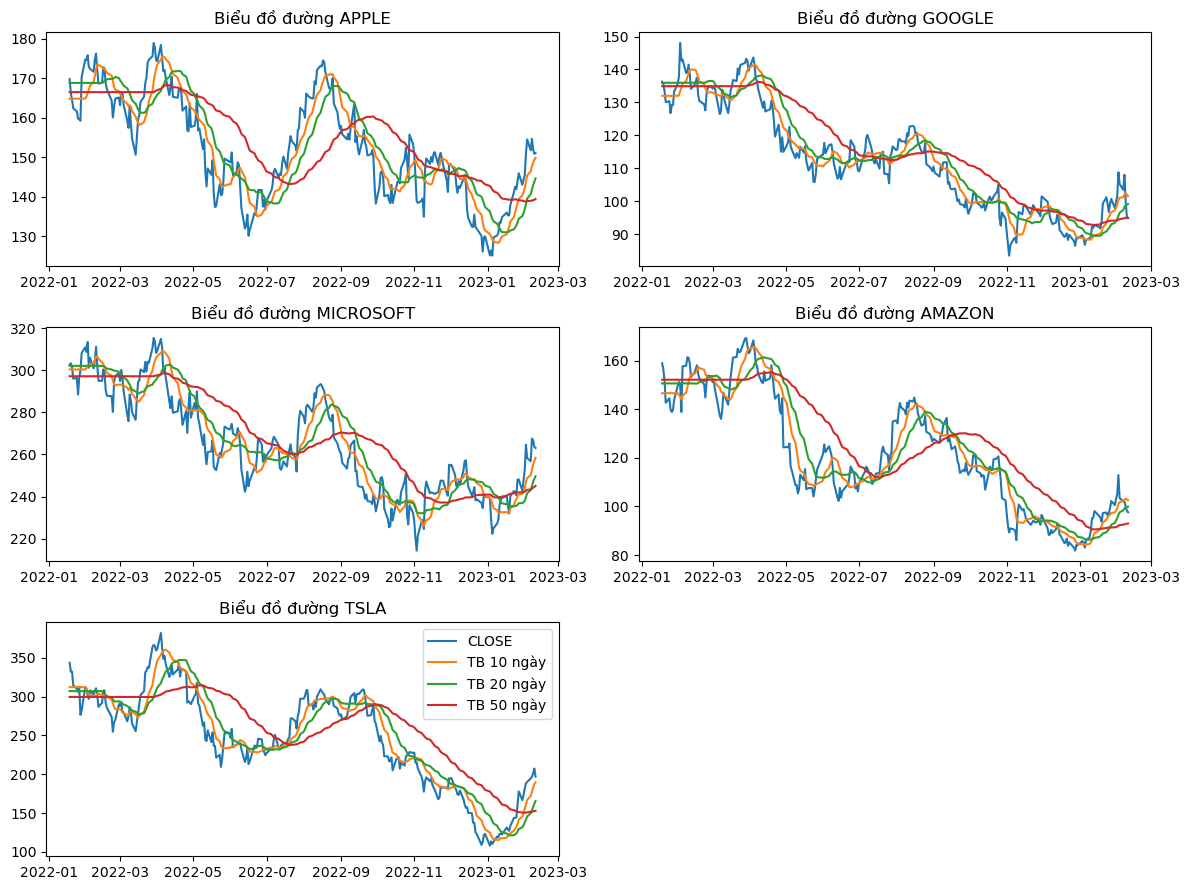

In [21]:
plt.figure(figsize=(12, 9))
for h in betal:
    plt.subplot(3, 2, h+1)
    plt.plot(betal[h].Date,betal[h].Close,label='CLOSE')
    plt.plot(betal[h].Date,betal[h]['TB 10 ngày'],label='TB 10 ngày')
    plt.plot(betal[h].Date,betal[h]['TB 20 ngày'],label='TB 20 ngày')
    plt.plot(betal[h].Date,betal[h]['TB 50 ngày'],label='TB 50 ngày')
    plt.title('Biểu đồ đường '+b[h])
plt.legend()
plt.tight_layout()  

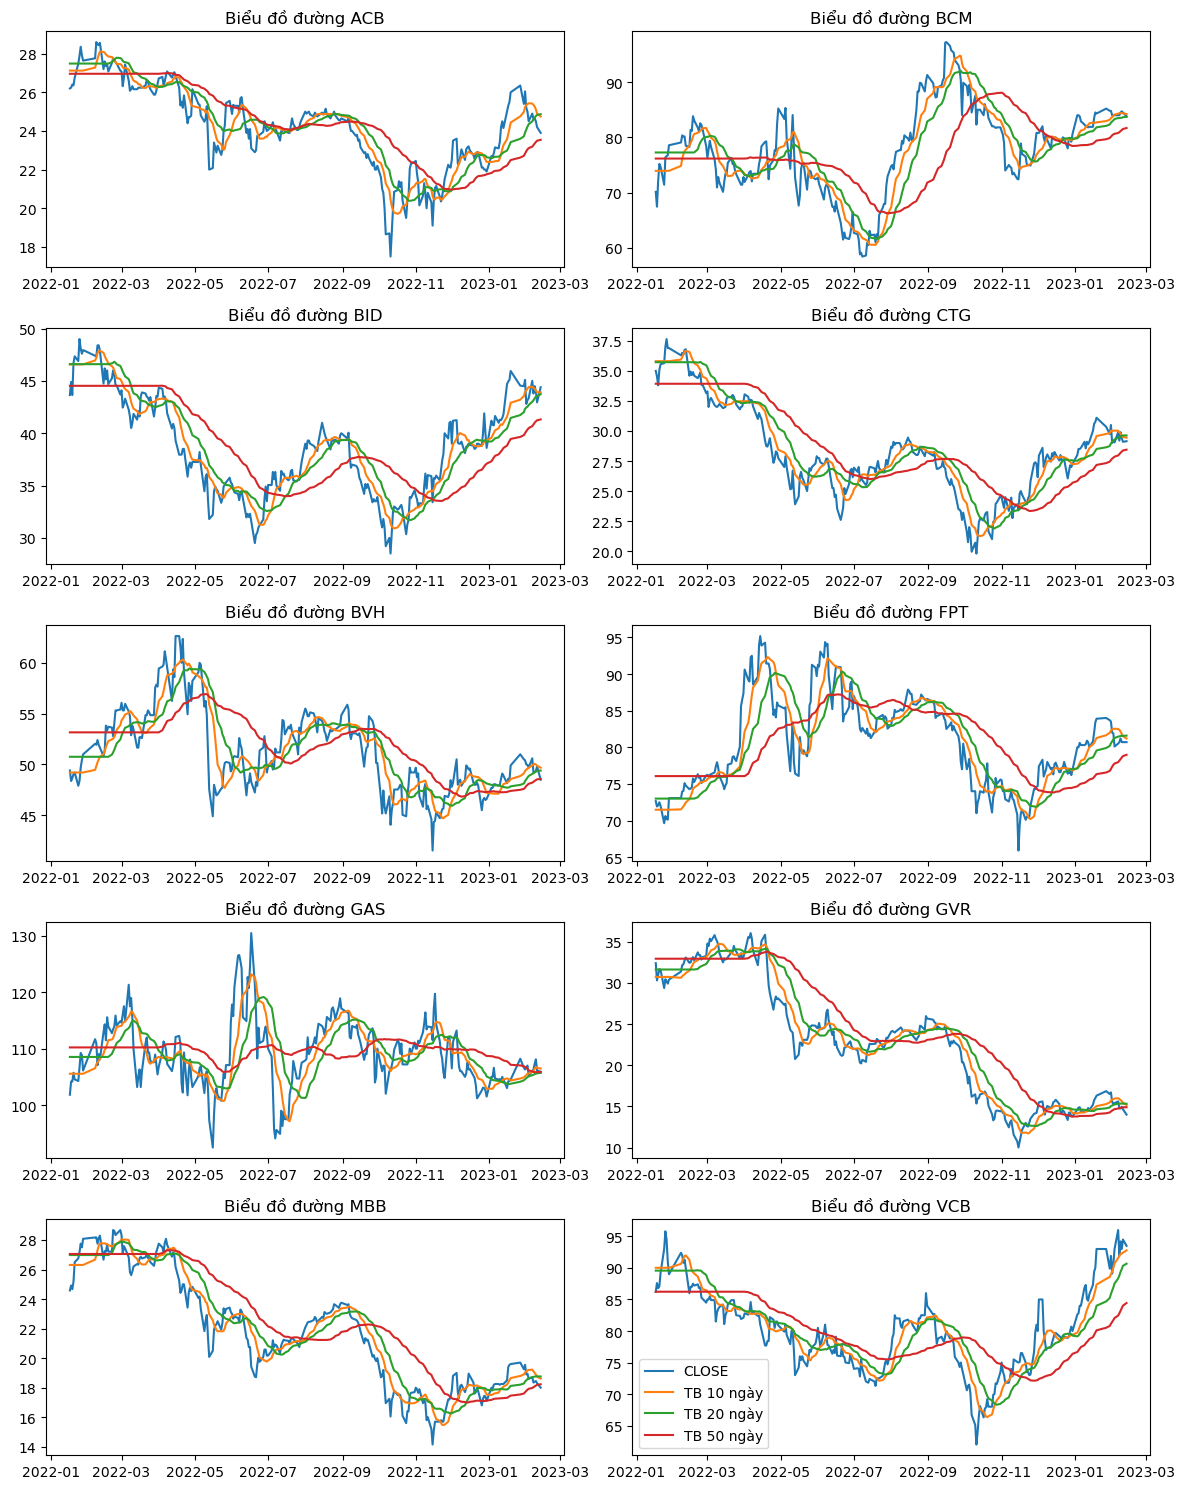

In [22]:
plt.figure(figsize=(12, 15))
for h in dental:
    plt.subplot(5, 2, h+1)
    plt.plot(dental[h].Date,dental[h].Close,label='CLOSE')
    plt.plot(dental[h].Date,dental[h]['TB 10 ngày'],label='TB 10 ngày')
    plt.plot(dental[h].Date,dental[h]['TB 20 ngày'],label='TB 20 ngày')
    plt.plot(dental[h].Date,dental[h]['TB 50 ngày'],label='TB 50 ngày')
    plt.title('Biểu đồ đường '+a[h])
plt.legend()
plt.tight_layout()

## Đánh giá:
- Đường TB 10 ngày nắm bắt tốt xu hướng dữ liệu ít bị nhiễu
- Đường TB 20 ngày hơi nhiễu 1 chút còn đường 50 ngày thì rất tệ

# Phân tích kĩ cơ bản rủi ro của cổ phiếu bằng cách tính tỷ lệ thay đổi theo ngày của cổ phiếu

In [23]:
for h in dental:
    dental[h]['Tỷ Lệ(ngày)']=dental[h].Close.pct_change()
for h in betal:
    betal[h]['Tỷ Lệ(ngày)']=betal[h].Close.pct_change()
    

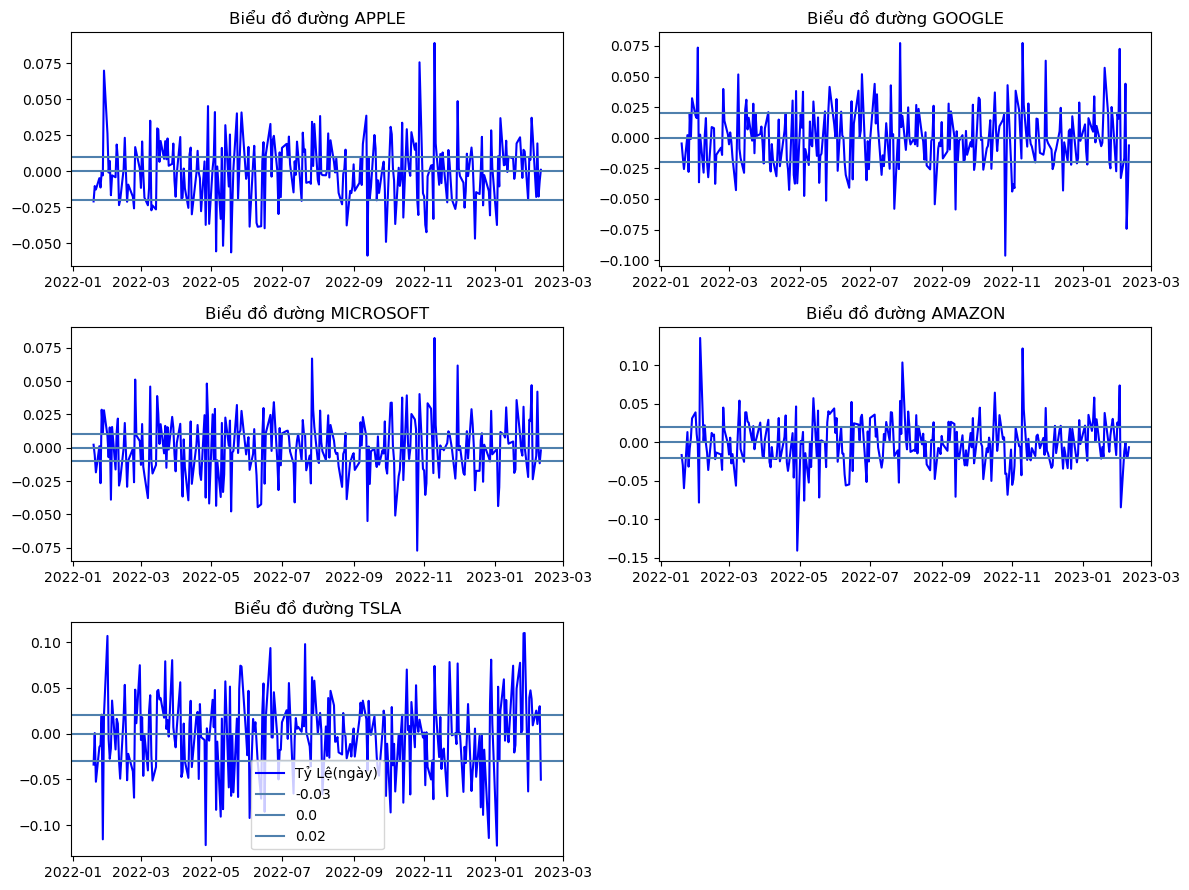

In [24]:
plt.figure(figsize=(12, 9))
for h in betal:
    plt.subplot(3, 2, h+1)

    plt.plot(betal[h].Date,betal[h]['Tỷ Lệ(ngày)'],color='blue',label='Tỷ Lệ(ngày)')
    plt.title('Biểu đồ đường '+b[h])

    Q1=round(betal[h]['Tỷ Lệ(ngày)'].quantile(0.25),2)
    Q2=round(betal[h]['Tỷ Lệ(ngày)'].quantile(0.5),2)
    Q3=round(betal[h]['Tỷ Lệ(ngày)'].quantile(0.75),2)
    
    plt.axhline(y=Q1, color='#4f80ad',label=Q1)
    plt.axhline(y=Q2, color='#4f80ad',label=Q2)
    plt.axhline(y=Q3, color='#4f80ad',label=Q3)
    
plt.legend()    
plt.tight_layout()


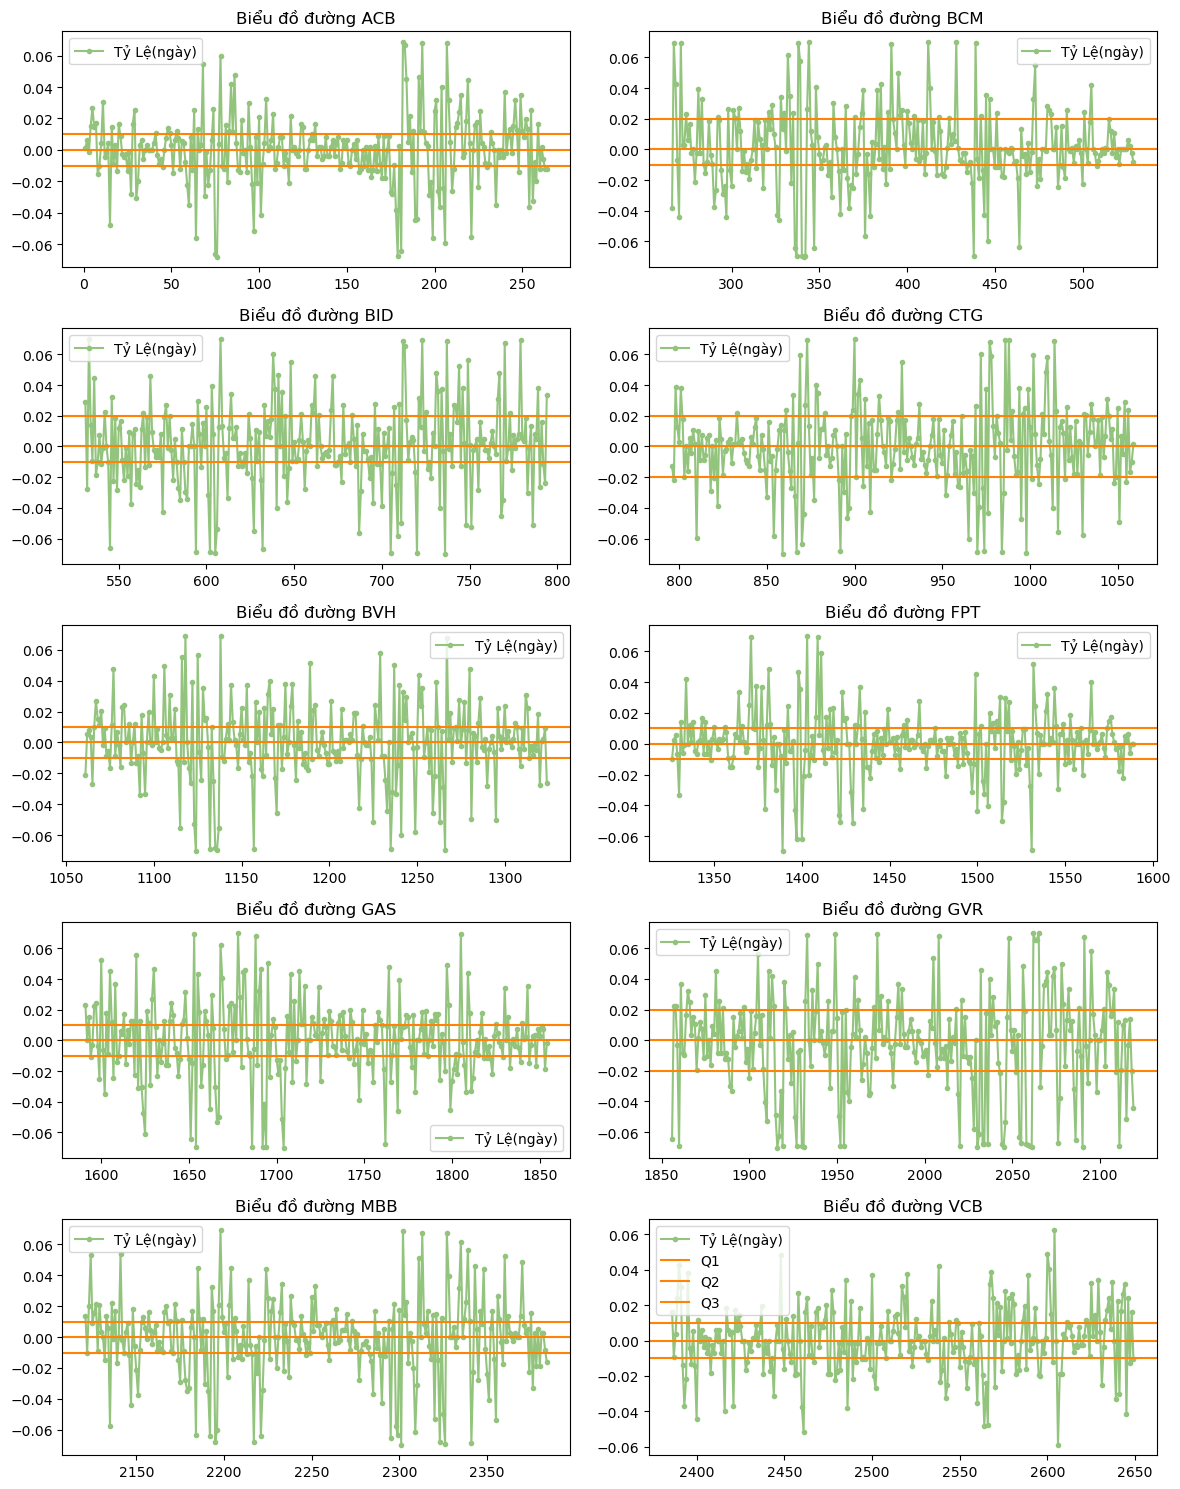

In [25]:
plt.figure(figsize=(12, 15))
for h in dental:
    plt.subplot(5, 2, h+1)
    dental[h]['Tỷ Lệ(ngày)'].plot( legend=True,color='#93c47d', marker='.')
#    plt.plot(dental[h].t,dental[h]['Tỷ Lệ(ngày)'],color='green',label='Tỷ Lệ(ngày)')
    plt.title('Biểu đồ đường '+a[h])
    
    Q1=round(dental[h]['Tỷ Lệ(ngày)'].quantile(0.25),2)
    Q2=round(dental[h]['Tỷ Lệ(ngày)'].quantile(0.5),2)
    Q3=round(dental[h]['Tỷ Lệ(ngày)'].quantile(0.75),2)
    
    plt.axhline(y=Q1, color='#ff8304',label='Q1')
    plt.axhline(y=Q2, color='#ff8304',label='Q2')
    plt.axhline(y=Q3, color='#ff8304',label='Q3')
plt.legend()    
plt.tight_layout()

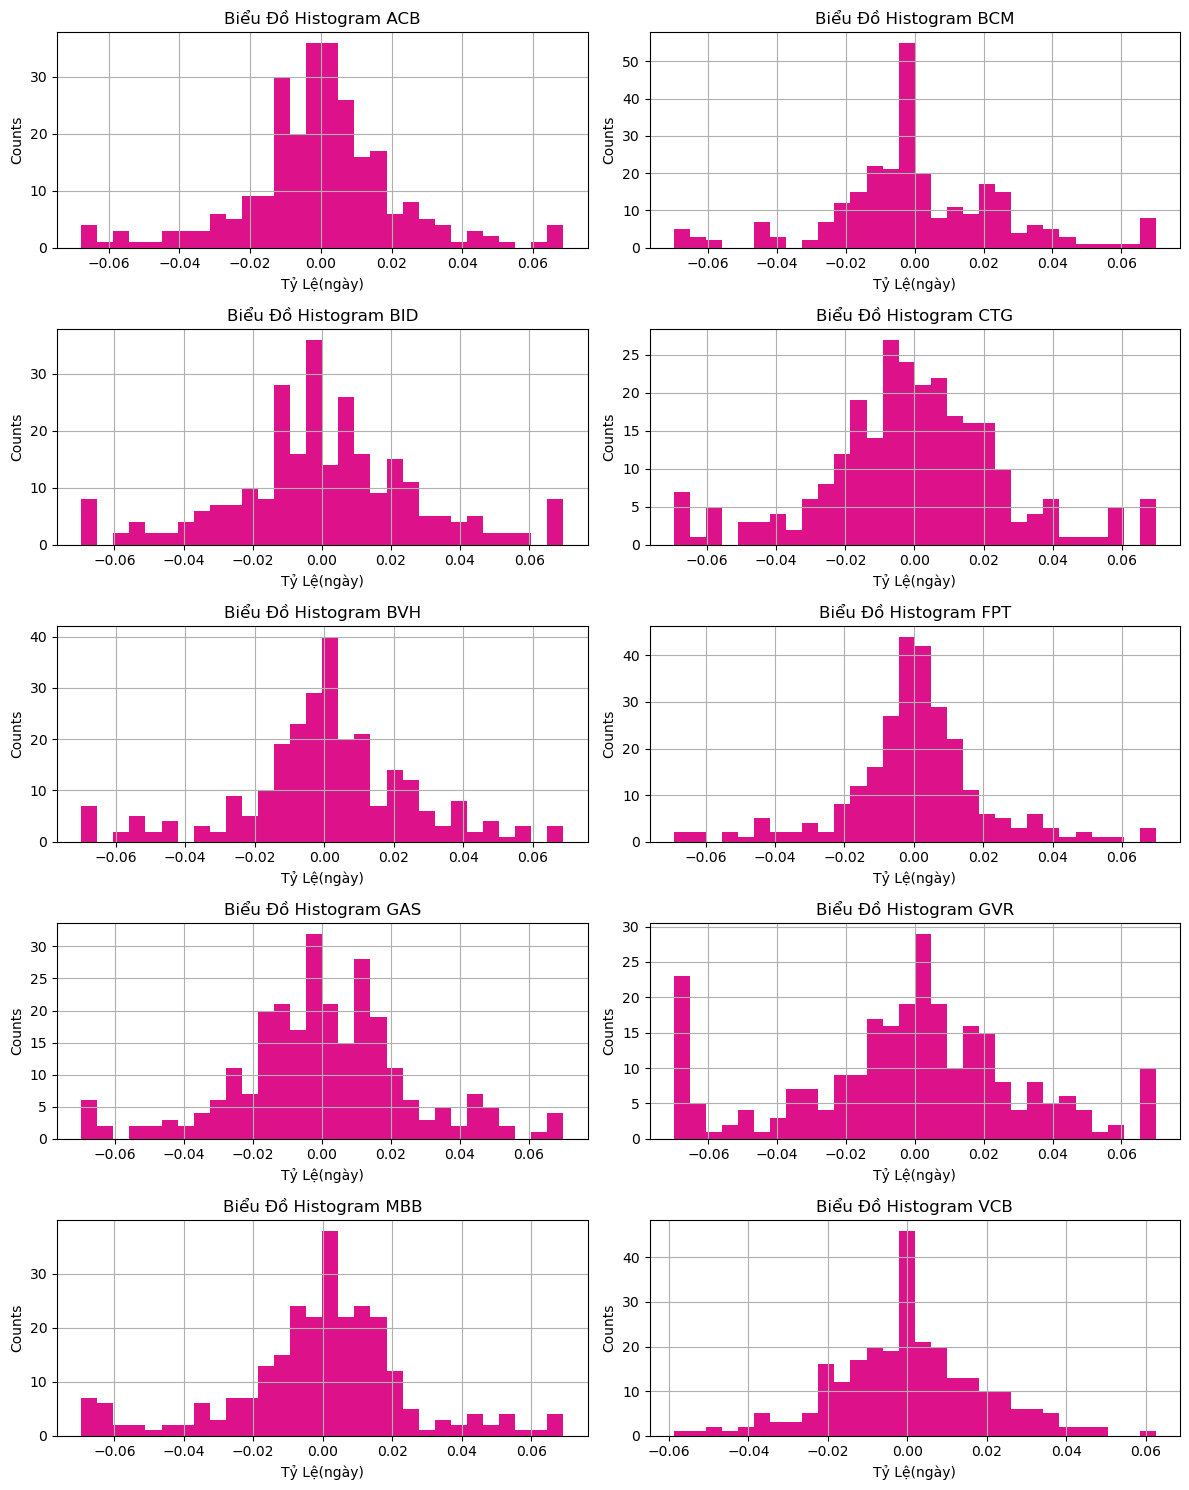

In [26]:
plt.figure(figsize=(12, 15))

for h in dental:
    plt.subplot(5, 2, h+1)
    dental[h]['Tỷ Lệ(ngày)'].hist(bins=30,color='#dd1189')
    plt.xlabel('Tỷ Lệ(ngày)')
    plt.ylabel('Counts')
    plt.title(f'Biểu Đồ Histogram '+a[h])
    
plt.tight_layout()

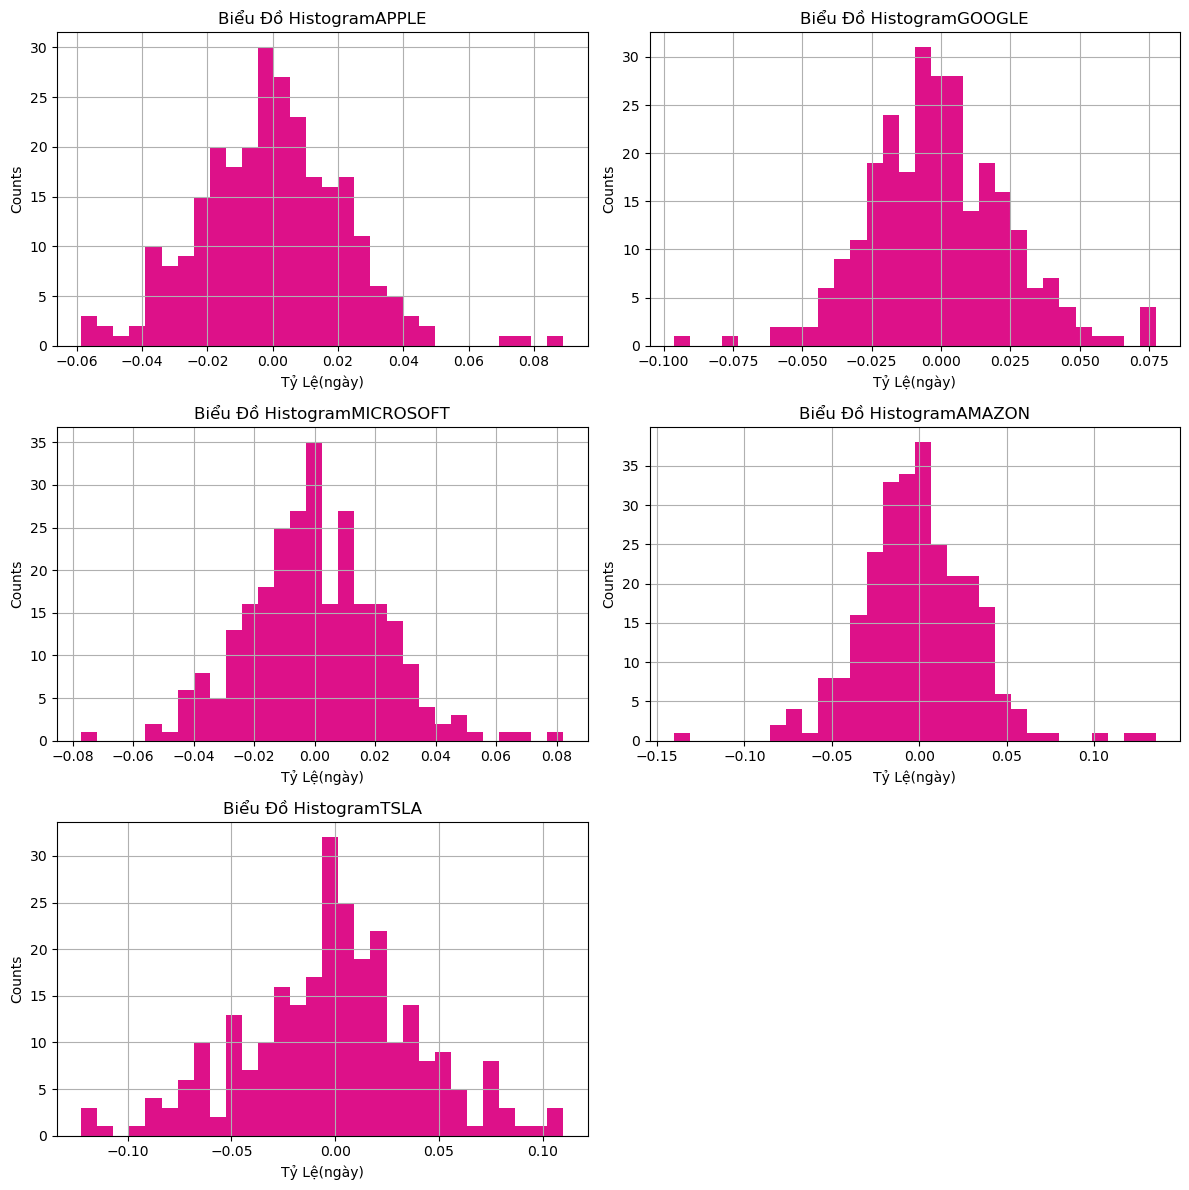

In [27]:
plt.figure(figsize=(12, 12))

for h in betal:
    plt.subplot(3, 2, h+1)
    betal[h]['Tỷ Lệ(ngày)'].hist(bins=30,color='#dd1189')
    plt.xlabel('Tỷ Lệ(ngày)')
    plt.ylabel('Counts')
    plt.title(f'Biểu Đồ Histogram'+b[h])
    
plt.tight_layout()

## Nhận xét
- ta thấy tỷ lệ của các công ty rất ổn định phân phối tần số tập trung quanh 0 
- rủi do ổn định

# XÂY DỰNG MÔ HÌNH HỌC MÁY

## Ý tưởng khai thác dữ liệu
### bài toán:Phát hiện xu hướng thị trường sử dụng các mô hình học máy để phát hiện và dự đoán xu hướng tăng giá hoặc giảm giá trên thị trường cổ phiếu
- trên thực tế để dự đoán giá đóng cửa của cổ phiếu ta không có những giá trị của High Low hay Volume của ngày hôm đó
- nên ta sẽ dựa vào các đường MA và giá mở của ngày hôm đấy và các thuộc tính của ngày hôm trước để dự đoán giá đóng của ngày hôm nay sẽ tăng hay giảm

### Ở đây ta sinh ra 1 cột xu hướng để xác định Giá cổ phiếu tăng hay giảm
- tăng thì xu hướng =1 còn
- giảm thì xu hướng =0

In [28]:
for h in dental:
    dental[h]['Xu hướng'] = dental[h]['Tỷ Lệ(ngày)'].apply(lambda x: 1 if x >= 0 else 0)
for h in betal:
    betal[h]['Xu hướng'] = betal[h]['Tỷ Lệ(ngày)'].apply(lambda x: 1 if x >= 0 else 0)

- Xu hướng của ngày hôm nay dự đoán nhờ ngày hôm qua và giá mở của ngày hôm nay 
- --> lên ta dịch chuyển cột Xu hướng, Date lên 1 hàng và sinh ra cột newOpen bằng cột open dịch lên 1 hàng 

In [29]:
betal[1].tail(4)

,Date,Open,High,Low,Close,Volume,company_name,TB 10 ngày,TB 20 ngày,TB 50 ngày,Tỷ Lệ(ngày),Xu hướng
534,2023-02-07,103.629997,108.669998,103.547997,108.040001,33738800,GOOGLE,102.138001,98.257001,94.9086,0.044167,1
535,2023-02-08,102.690002,103.580002,98.455002,100.000000,73546000,GOOGLE,102.465001,98.795001,94.9566,-0.074417,0
536,2023-02-09,100.540001,100.610001,93.860001,95.459999,97798600,GOOGLE,102.095000,98.955001,94.9408,-0.045400,0
537,2023-02-10,95.739998,97.019997,94.529999,94.860001,49325300,GOOGLE,101.510001,99.102501,94.9292,-0.006285,0


In [30]:
for h in dental:
    dental[h]['Xu hướng'] = dental[h]['Xu hướng'].shift(-1)
    dental[h]['Date'] = dental[h]['Date'].shift(-1)
    dental[h]['New_Open']=dental[h]['Open'].shift(-1)
for h in betal:
    betal[h]['Xu hướng'] = betal[h]['Xu hướng'].shift(-1)
    betal[h]['Date'] = betal[h]['Date'].shift(-1)
    betal[h]['New_Open']=betal[h]['Open'].shift(-1)
betal[0].tail(4)

,Date,Open,High,Low,Close,Volume,company_name,TB 10 ngày,TB 20 ngày,TB 50 ngày,Tỷ Lệ(ngày),Xu hướng,New_Open
265,2023-02-08,150.639999,155.229996,150.639999,154.649994,83322600,APPLE,147.616998,141.824500,138.992999,0.019245,0.0,153.880005
266,2023-02-09,153.880005,154.580002,151.169998,151.919998,64120100,APPLE,148.622998,142.884000,139.069199,-0.017653,0.0,153.779999
267,2023-02-10,153.779999,154.330002,150.419998,150.869995,56007100,APPLE,149.313997,143.752999,139.202199,-0.006912,1.0,149.460007
268,NaT,149.460007,151.339996,149.220001,151.009995,57450700,APPLE,149.821997,144.632999,139.398999,0.000928,NaN,NaN


### Ghép bảng vào chuẩn hóa dữ liệu

In [31]:
Manh1=dental[0]
Manh2=betal[0]
for i in range(1,10):
    Manh1=pd.concat([Manh1,dental[i]], axis=0,ignore_index=1,sort=1)
for i in range(1,5):
    Manh2=pd.concat([Manh2,betal[i]], axis=0,ignore_index=1,sort=1)

In [32]:
Manh1['Region']='VN'

In [33]:
Manh2['Region']='TG'

In [34]:
Manh=pd.concat([Manh1,Manh2], axis=0,ignore_index=1,sort=1)
Manh.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Close         3995 non-null   float64       
 1   Date          3980 non-null   datetime64[ns]
 2   High          3995 non-null   float64       
 3   Low           3995 non-null   float64       
 4   New_Open      3980 non-null   float64       
 5   Open          3995 non-null   float64       
 6   Region        3995 non-null   object        
 7   TB 10 ngày    3995 non-null   float64       
 8   TB 20 ngày    3995 non-null   float64       
 9   TB 50 ngày    3995 non-null   float64       
 10  Tỷ Lệ(ngày)   3980 non-null   float64       
 11  Volume        3995 non-null   int64         
 12  Xu hướng      3980 non-null   float64       
 13  company_name  3995 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 437.1+ KB


In [35]:
# Xóa cột date gây nhiễu
Manh=Manh.drop('Date',axis=1)
Manh=Manh.dropna()

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Manh['Region'] = le.fit_transform(Manh['Region'])
Manh['company_name'] = le.fit_transform(Manh['company_name'])

In [37]:
Manh['Xu hướng'].astype(int)

1       1
2       0
3       1
4       1
5       1
       ..
3989    1
3990    1
3991    1
3992    1
3993    0
Name: Xu hướng, Length: 3965, dtype: int32

In [38]:
Manh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 1 to 3993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         3965 non-null   float64
 1   High          3965 non-null   float64
 2   Low           3965 non-null   float64
 3   New_Open      3965 non-null   float64
 4   Open          3965 non-null   float64
 5   Region        3965 non-null   int32  
 6   TB 10 ngày    3965 non-null   float64
 7   TB 20 ngày    3965 non-null   float64
 8   TB 50 ngày    3965 non-null   float64
 9   Tỷ Lệ(ngày)   3965 non-null   float64
 10  Volume        3965 non-null   int64  
 11  Xu hướng      3965 non-null   float64
 12  company_name  3965 non-null   int32  
dtypes: float64(10), int32(2), int64(1)
memory usage: 402.7 KB


## Phân chia tập dữ liệu và học máy

In [39]:
X = np.array(Manh.drop(["Xu hướng"], axis=1))
y = np.array(Manh["Xu hướng"])

In [40]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# chia tập đánh giá và tập huấn luyện
rate = 0.8
X_train1, X_val, y_train1, y_val = train_test_split(X,y, train_size = rate)
# đánh giá xem mô hình học máy nào tốt hơn



In [42]:
ac=np.zeros((19,5))
kf = KFold(n_splits=5)
cot=0
for (train,test )in kf.split(X_train1):
    X_train, X_test, y_train, y_test = X_train1[train], X_train1[test], y_train1[train], y_train1[test]
    hang=0
    for i in range(2,20):
        dt=DecisionTreeClassifier(max_depth=i)
        dt.fit(X_train,y_train)
        ydt=dt.predict(X_test)
        ac[hang,cot]=metrics.accuracy_score(ydt,y_test)
        hang+=1
    cot+=1
a=np.mean(ac, axis=1)
index=np.argmax(a)
print(ac)
print(a)
print(a.max(),index)

[[0.52755906 0.51496063 0.51892744 0.51104101 0.54574132]
 [0.52755906 0.51181102 0.52839117 0.55520505 0.55205047]
 [0.53385827 0.51496063 0.53154574 0.55993691 0.55362776]
 [0.53228346 0.50551181 0.5126183  0.55678233 0.55835962]
 [0.52755906 0.50393701 0.51104101 0.54731861 0.55362776]
 [0.52125984 0.49291339 0.47634069 0.55835962 0.55362776]
 [0.53385827 0.50708661 0.52365931 0.5488959  0.53785489]
 [0.51338583 0.51496063 0.52050473 0.54258675 0.53470032]
 [0.50866142 0.51023622 0.49684543 0.54574132 0.52523659]
 [0.49606299 0.50866142 0.48895899 0.54258675 0.53470032]
 [0.5023622  0.4992126  0.49842271 0.53943218 0.53943218]
 [0.51496063 0.50708661 0.52523659 0.50946372 0.53470032]
 [0.50393701 0.50551181 0.52365931 0.53943218 0.48580442]
 [0.46141732 0.50551181 0.49211356 0.54574132 0.4873817 ]
 [0.5007874  0.48976378 0.51735016 0.50788644 0.50630915]
 [0.4992126  0.47244094 0.50788644 0.54416404 0.50315457]
 [0.5023622  0.47874016 0.5126183  0.52523659 0.50473186]
 [0.5023622  0

In [43]:
ac=np.zeros((19,5))
kf = KFold(n_splits=5)
cot=0
for (train,test )in kf.split(X_train1):
    X_train, X_test, y_train, y_test = X_train1[train], X_train1[test], y_train1[train], y_train1[test]
    hang=0
    for i in range(2,20):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        yknn=knn.predict(X_test)
        ac[hang,cot]=metrics.accuracy_score(yknn,y_test)
        hang+=1
    cot+=1
a=np.mean(ac, axis=1)
index=np.argmax(a)
print(ac)
print(a)
print(a.max(),index)

[[0.51023622 0.4976378  0.48264984 0.49684543 0.50946372]
 [0.51338583 0.52598425 0.50473186 0.51577287 0.52523659]
 [0.51023622 0.50551181 0.47634069 0.51419558 0.51419558]
 [0.48976378 0.51338583 0.51104101 0.50946372 0.52208202]
 [0.51338583 0.50551181 0.50630915 0.52839117 0.5126183 ]
 [0.51338583 0.5007874  0.51892744 0.52365931 0.50157729]
 [0.51181102 0.47559055 0.49369085 0.50946372 0.51419558]
 [0.48661417 0.48346457 0.50630915 0.51892744 0.51419558]
 [0.47559055 0.48976378 0.50630915 0.50788644 0.5       ]
 [0.51181102 0.51811024 0.5        0.52208202 0.49684543]
 [0.52913386 0.49448819 0.48895899 0.50946372 0.50946372]
 [0.51653543 0.52125984 0.49684543 0.52208202 0.5126183 ]
 [0.51496063 0.4976378  0.49684543 0.50630915 0.51419558]
 [0.51496063 0.49133858 0.4873817  0.52208202 0.51419558]
 [0.52440945 0.5023622  0.49053628 0.50946372 0.52681388]
 [0.50866142 0.49448819 0.48264984 0.52839117 0.52681388]
 [0.50393701 0.51496063 0.48264984 0.49526814 0.52365931]
 [0.49291339 0

In [44]:
ac=np.zeros((15,5))
kf = KFold(n_splits=5)
gamma={2**-11,2**-10,2**-9,2**-8,2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**-0,2**1,2**2,2**3}
cot=0
for (train,test )in kf.split(X_train1):
    X_train, X_test, y_train, y_test = X_train1[train], X_train1[test], y_train1[train], y_train1[test]
    hang=0
    for i in gamma:
        SVM = SVC(gamma=i)
        SVM.fit(X_train,y_train)
        ySVM=SVM.predict(X_test)
        ac[hang,cot]=metrics.accuracy_score(ySVM,y_test)
        hang+=1
    cot+=1
a=np.mean(ac, axis=1)
index=np.argmax(a)
print(ac)
print(a)
print(a.max(),index)

[[0.50551181 0.53070866 0.54258675 0.51892744 0.50315457]
 [0.50551181 0.52913386 0.54258675 0.51892744 0.50315457]
 [0.50551181 0.52913386 0.54258675 0.51892744 0.50315457]
 [0.50551181 0.52913386 0.54100946 0.51735016 0.50315457]
 [0.50551181 0.52913386 0.54100946 0.51892744 0.50315457]
 [0.50393701 0.53228346 0.54100946 0.51735016 0.50315457]
 [0.50551181 0.53228346 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]
 [0.50551181 0.53385827 0.53943218 0.51577287 0.50315457]]
[0.52017785 0.51986289 0.51986289 0.51923197 0.51954743 0.51954693
 0.51923098 0.51954594 0.51954594 0.51954594 0.51954594 0.5195

## mô hình có độ chính xác tốt nhất là DecisionTreeClassifier với max_depth=2+2

- đánh giá với tập Val và với cả không gian mẫu


In [47]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
ydt1=dt.predict(X_val)

a=metrics.accuracy_score(ydt1,y_val)
report_a = classification_report(ydt1,y_val)

ydt2=dt.predict(X)
b=metrics.accuracy_score(ydt2,y)
report_b = classification_report(ydt1,y_val)


print(a,b)
print('report', report_a,report_b)

0.532156368221942 0.5493064312736444
report               precision    recall  f1-score   support

         0.0       0.31      0.49      0.38       230
         1.0       0.73      0.55      0.62       563

    accuracy                           0.53       793
   macro avg       0.52      0.52      0.50       793
weighted avg       0.60      0.53      0.55       793
               precision    recall  f1-score   support

         0.0       0.31      0.49      0.38       230
         1.0       0.73      0.55      0.62       563

    accuracy                           0.53       793
   macro avg       0.52      0.52      0.50       793
weighted avg       0.60      0.53      0.55       793

